In [1]:
# %matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [3]:
california_csv = "clean_data/finalized_california_data.csv"
georgia_csv = "clean_data/finalized_georgia_data.csv"

california_data = pd.read_csv(california_csv)
georgia_data = pd.read_csv(georgia_csv)

pd.options.display.max_columns = None

In [4]:
california_data.columns

Index(['Unnamed: 0', 'id', 'streetAddress', 'city', 'state', 'zipcode',
       'longitude', 'latitude', 'yearBuilt', 'isNewConstruction',
       'posted_year', 'posted_month', 'price', 'pricePerSquareFoot',
       'bedrooms', 'bathrooms', 'pool', 'spa', 'description'],
      dtype='object')

In [5]:
california_count = california_data["id"].count()
california_average_price = california_data["price"].mean()
california_median_price = california_data["price"].median()
california_average_price_sqft = california_data["pricePerSquareFoot"].mean()
california_median_price_sqft = california_data["pricePerSquareFoot"].median()
california_new_houses = len(california_data.loc[california_data["isNewConstruction"] == 1])
california_old_houses = len(california_data.loc[california_data["isNewConstruction"] == 0])
california_oldest_house = california_data["yearBuilt"].min()
california_newest_house = california_data["yearBuilt"].max()
california_build_mode = california_data["yearBuilt"].mode()
california_build_mode = california_build_mode.iloc[0]

georgia_count = georgia_data["id"].count()
georgia_average_price = georgia_data["price"].mean()
georgia_median_price = georgia_data["price"].median()
georgia_average_price_sqft = georgia_data["pricePerSquareFoot"].mean()
georgia_median_price_sqft = georgia_data["pricePerSquareFoot"].median()
georgia_new_houses = len(georgia_data.loc[georgia_data["isNewConstruction"] == 1])
georgia_old_houses = len(georgia_data.loc[georgia_data["isNewConstruction"] == 0])
georgia_oldest_house = georgia_data["yearBuilt"].min()
georgia_newest_house = georgia_data["yearBuilt"].max()
georgia_build_mode = georgia_data["yearBuilt"].mode()
georgia_build_mode = georgia_build_mode.iloc[0]


In [6]:
summary_series = { "Number of Houses" : [california_count, georgia_count],
                "Average House Price" : [california_average_price, georgia_average_price],
                "Median House Price" : [california_median_price, georgia_median_price],
                "Average Price per SqFt" : [california_average_price_sqft, georgia_average_price_sqft],
                "Median Price per SqFt" : [california_median_price_sqft, georgia_median_price_sqft],
                "Number of Old Homes" : [california_old_houses, georgia_old_houses],
                "Number of New Homes" : [california_new_houses, georgia_new_houses],
                "Oldest Home" : [california_oldest_house, georgia_oldest_house],
                "Newest Home" : [california_newest_house, georgia_newest_house],
                "Most Frequent Build Year" : [california_build_mode, georgia_build_mode],
                }

summary_comparison = pd.DataFrame(data = summary_series, index = ["California", "Georgia"])

summary_comparison["Average House Price"] = summary_comparison["Average House Price"].astype(float).map("${:,.2f}".format)
summary_comparison["Median House Price"] = summary_comparison["Median House Price"].astype(float).map("${:,.2f}".format)
summary_comparison["Average Price per SqFt"] = summary_comparison["Average Price per SqFt"].astype(float).map("${:,.2f}".format)
summary_comparison["Median Price per SqFt"] = summary_comparison["Median Price per SqFt"].astype(float).map("${:,.2f}".format)

summary_comparison = summary_comparison.transpose()

summary_comparison

,California,Georgia
Number of Houses,15206,5144
Average House Price,"$1,253,013.29","$456,613.81"
Median House Price,"$789,000.00","$339,900.00"
Average Price per SqFt,$572.63,$180.80
Median Price per SqFt,$475.00,$155.00
Number of Old Homes,15014,4844
Number of New Homes,192,300
Oldest Home,1850,1790
Newest Home,2022,2022
Most Frequent Build Year,1979,2021


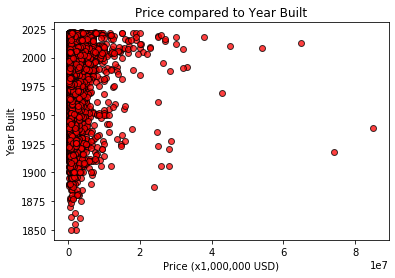

In [14]:
x_axis = california_data["price"]
y_axis = california_data["yearBuilt"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Price compared to Year Built")
plt.xlabel("Price (x1,000,000 USD)")
plt.ylabel("Year Built")

# plt.savefig('Price_vs_yearbuilt.png')


plt.show()

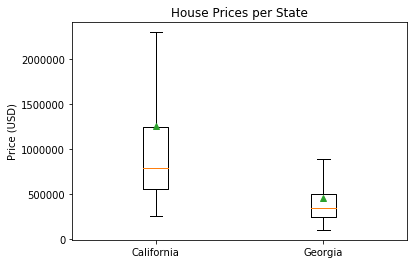

In [12]:
prices_dictionary = {'California': california_data["price"], 'Georgia': georgia_data["price"]}
fig, ax = plt.subplots()
ax.boxplot(prices_dictionary.values(), showfliers = False, showmeans = True)
ax.set_xticklabels(prices_dictionary.keys())
ax.set_title('House Prices per State')
ax.set_ylabel('Price (USD)')

# plt.savefig('Boxplot_comparison.png')

plt.show()


In [9]:
quartiles = california_data["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

california_outliers = len(california_data.loc[california_data["price"] >= upper_bound])
print(f"There are {california_outliers} outliers in California.")


The lower quartile of price is: 549900.0
The upper quartile of price is: 1250000.0
The interquartile range of prices is: 700100.0
The the median of price is: 789000.0 
Values below -500250.0 could be outliers.
Values above 2300150.0 could be outliers.
There are 1393 outliers in California.


In [10]:
quartiles = georgia_data["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

georgia_outliers = len(georgia_data.loc[georgia_data["price"] >= upper_bound])
print(f"There are {georgia_outliers} outliers in Georgia.")

The lower quartile of price is: 239900.0
The upper quartile of price is: 499000.0
The interquartile range of prices is: 259100.0
The the median of price is: 339900.0 
Values below -148750.0 could be outliers.
Values above 887650.0 could be outliers.
There are 400 outliers in Georgia.


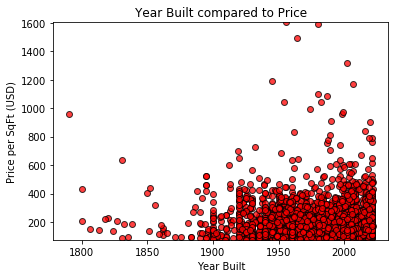

In [15]:
x_axis = georgia_data["yearBuilt"]
y_axis = georgia_data["pricePerSquareFoot"]
price_min = georgia_data["pricePerSquareFoot"].min()
upper_bound = georgia_data["pricePerSquareFoot"].max()

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylim(price_min,upper_bound)
plt.title("Year Built compared to Price")
plt.xlabel("Year Built")
plt.ylabel("Price per SqFt (USD)")

# plt.savefig('Pricesqft_vs_yearbuilt.png')

plt.show()